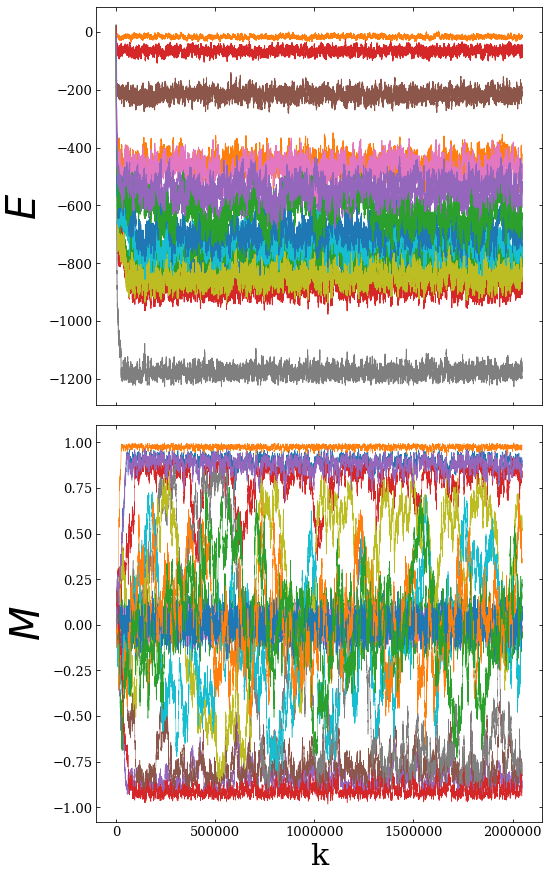

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
#import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches



mylist11 = []
mylist12 = []


plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.05)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(0.,0.7)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.axes.xaxis.set_ticklabels([])
ax2.set_ylabel(r'$E$',fontsize=40)
ax1.set_ylabel(r'$M$',fontsize=40)
ax1.set_xlabel('k',fontsize=30)


folder_path = '/home/enzo/Desktop/FisicaComp/Metropolis/Data/'
for filename in glob.glob(os.path.join(folder_path,'MMCMag'+'_'+'*.dat')):
    data = pd.read_table(filename, header=None, sep="\s+")
    kmag        =data.iloc[:,0]
    Mag         =data.iloc[:,1]
    x=kmag
    y=Mag
    ax1.plot(x, y, linewidth=0.5,label='_nolegend_')        
            
folder_path = '/home/enzo/Desktop/FisicaComp/Metropolis/Data/'
for filename in glob.glob(os.path.join(folder_path,'MMCEn'+'_'+'*.dat')):
    dataDMO = pd.read_table(filename, header=None, sep="\s+")
    ken        =dataDMO.iloc[:,0]
    En         =dataDMO.iloc[:,1]
    x=ken
    y=En

    ax2.plot(x, y, linewidth=1.,ls='-',label='_nolegend_')
        


plt.savefig('/home/enzo/Desktop/FisicaComp/Metropolis/EryMag.pdf', bbox_inches='tight', rasterized=True, dpi=300) ### for publication





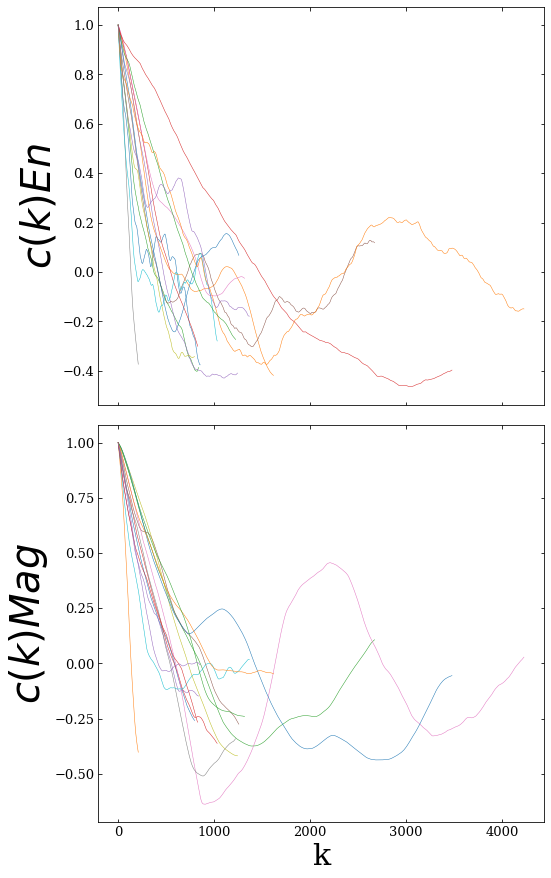

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
#import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches



mylist11 = []
mylist12 = []


plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.05)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(0.,0.7)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.axes.xaxis.set_ticklabels([])
ax2.set_ylabel(r'$c(k)En$',fontsize=40)
ax1.set_ylabel(r'$c(k)Mag$',fontsize=40)
ax1.set_xlabel('k',fontsize=30)


folder_path = '/home/enzo/Desktop/FisicaComp/Metropolis/Data/'
for filename in glob.glob(os.path.join(folder_path,'MMCMag'+'_'+'*.dat')):
    data = pd.read_table(filename, header=None, sep="\s+")
    data = data[data.iloc[:,0].between(20000,30000, inclusive=True)]
    kmag        =data.iloc[:,0]
    Mag         =data.iloc[:,1]
    x=kmag
    y=Mag
    index=int(len(kmag)/2)
    
    yunbiased = y-np.mean(y)
    ynorm = np.sum(yunbiased**2)
    acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
    acor = acor[index:]
    
    ax1.plot(acor, linewidth=0.5,label='_nolegend_')        
            
folder_path = '/home/enzo/Desktop/FisicaComp/Metropolis/Data/'
for filename in glob.glob(os.path.join(folder_path,'MMCEn'+'_'+'*.dat')):
    data = pd.read_table(filename, header=None, sep="\s+")
    data = data[data.iloc[:,0].between(20000,30000, inclusive=True)]
    kEn        =data.iloc[:,0]
    En         =data.iloc[:,1]
    x=kEn
    y=En
    index=int(len(kEn)/2)
    
    yunbiased = y-np.mean(y)
    ynorm = np.sum(yunbiased**2)
    acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
    acor = acor[index:]
    
    ax2.plot(acor, linewidth=0.5,label='_nolegend_')        
        


plt.savefig('/home/enzo/Desktop/FisicaComp/Metropolis/Ck.pdf', bbox_inches='tight', rasterized=True, dpi=300) ### for publication



